In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import datetime
import sklearn
from sklearn import *
sklearn.__version__
import numpy as np 
#import numpy as np
#import matplotlib.pyplot as plt
#import seaborn as sns
#%matplotlib inline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf, pacf
from time import time
import itertools
from scipy.stats.stats import mode
from statsmodels.tsa.statespace import sarimax
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from fbprophet import Prophet
# Install Pyomo and GLPK
!pip install -q pyomo
!apt-get install -y -qq glpk-utils
from pyomo.environ import *

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


     |████████████████████████████████| 9.6 MB 7.2 MB/s 
     |████████████████████████████████| 49 kB 4.5 MB/s 
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.1.2-2_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.1.2-2_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.1.2-2) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_4.65-1_amd64.deb ...
Unpacking libglpk40:amd64 (4.65-1) ...
Selecting previously unselected package glpk-utils.
Preparing to unpack .../glpk-utils_4.65-1_amd64.deb ...
Unpacking glpk-utils (4.65-1) ...
Setting up 

In [ ]:
from google.colab import files
import io
uploaded = files.upload()
df_scaling = pd.read_csv(io.BytesIO(uploaded['Scaling.csv']))
df_scaling_division=df_scaling[["Item_ID","Division_ID","Division_Scaling_Factor"]]
df_scaling_cluster=df_scaling[["Item_ID","Cluster_ID","Cluster_Scaling_Factor"]]
uploaded = files.upload()
df_items= pd.read_csv(io.BytesIO(uploaded['Item.csv']),parse_dates=['Ship_Date'])
uploaded = files.upload()
df_division = pd.read_csv(io.BytesIO(uploaded['Division.csv']), parse_dates=['Ship_Date']) 

Saving Scaling.csv to Scaling.csv


Saving Item.csv to Item.csv


Saving Division.csv to Division.csv


In [ ]:
uploaded = files.upload()
df_cluster = pd.read_csv(io.BytesIO(uploaded['Cluster.csv']), parse_dates=['Ship_Date']) 

Saving Cluster.csv to Cluster.csv


In [ ]:
divisions=list(df_division["Division_ID"].unique())
clusters=list(df_cluster["Cluster_ID"].unique())

In [ ]:
#Holt Winter Forecasting - Returns training and testing datasets with predicted values 
def Holt_Winter_Forecasting(training_dataset,testing_dataset,operation):
  training_dataset.head(5)
  training_dataset=training_dataset.set_index("Ship_Date")
  testing_dataset=testing_dataset.set_index("Ship_Date")
  y_train=training_dataset["Ship_Qty"]
  fitted_model = ExponentialSmoothing(y_train,trend=operation,seasonal=operation,seasonal_periods=13).fit(optimized=True)
  testing_dataset["Prediction_Holt"] = list(fitted_model.forecast(len(testing_dataset)))
  
  training_dataset["Prediction_Holt"]=list(fitted_model.forecast(len(training_dataset)))
  return training_dataset.reset_index(),testing_dataset.reset_index()

In [ ]:
#RMSE AND MAPE
def calculate_rmse(actual,predicted):
  rmse = np.sqrt(mean_squared_error(actual, predicted)).round(2)
  return rmse
def calculate_mape(actual,predicted):
  mape= np.round(np.mean(np.abs(actual-predicted)/actual)*100,2)
  return mape

###***Holt-Winter***


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dis

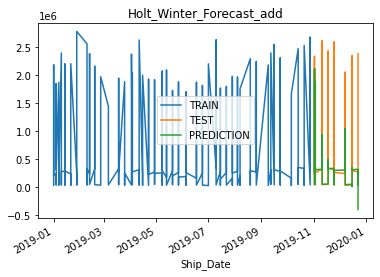

In [ ]:
#Train-Test DataSet: 80% training 20% testing
training_division_dataset=df_division[df_division["Ship_Date"]<datetime.datetime(2019,11,1)]
testing_division_dataset=df_division[df_division["Ship_Date"]>=datetime.datetime(2019,11,1)]

#x_train= training_dataset[["Division","Ship_Date"]]
training_division_dataset=training_division_dataset.set_index("Ship_Date")
testing_division_dataset=testing_division_dataset.set_index("Ship_Date")
y_train=training_division_dataset["Ship_Qty"]

#x_test= testing_dataset[["Division","Ship_Date"]]
y_test=testing_division_dataset["Ship_Qty"]

#Forecasting
operation="add"
df_test=pd.DataFrame()
#df_holt=pd.DataFrame(columns=["Ship_Date","Division","Ship_Qty","Prediction"])
for div in divisions:
  training_dataset=training_division_dataset[training_division_dataset["Division_ID"]==div].reset_index()
  testing_dataset=testing_division_dataset[testing_division_dataset["Division_ID"]==div].reset_index()
  training_dataset,testing_dataset=Holt_Winter_Forecasting(training_dataset,testing_dataset,operation)
  df_test=df_test.append(testing_dataset)

#Plotting
df_test=df_test.set_index("Ship_Date")
plot_title="Holt_Winter_Forecast" + "_" + operation
y_train.plot(legend=True,label='TRAIN')
y_test.plot(legend=True,label='TEST',figsize=(6,4))
df_test["Prediction_Holt"].plot(legend=True,label='PREDICTION')
plt.title(plot_title)
   
#Merging
df_test=df_test.reset_index()
df_holt = pd.merge(df_test,df_scaling_division,how='left',on="Division_ID")
df_holt["Item_forecast_Holt"]=df_holt["Prediction_Holt"]*df_holt["Division_Scaling_Factor"]
df_holt=df_holt[["Ship_Date","Division_ID","Item_ID","Item_forecast_Holt"]]
df_holt=pd.merge(df_holt,df_items[["Item_ID","Ship_Date","Ship_Qty"]],on=["Item_ID","Ship_Date"],how="left")
df_holt=df_holt[df_holt["Ship_Qty"]>0]


In [ ]:
#from google.colab import files

#training_division_dataset.to_csv('output2.csv', encoding = 'utf-8-sig') 
#files.download('output2.csv')

In [ ]:
items=list(df_items["Item_ID"].unique())
result=pd.DataFrame()
result2=pd.DataFrame()
for item in items:
  df=df_holt[df_holt["Item_ID"]==item]
  actual=df["Ship_Qty"]
  predicted=df["Item_forecast_Holt"]
  mape_holt= calculate_mape(actual,predicted)
  rmse_holt=calculate_rmse(actual,predicted)
  holt_result=pd.DataFrame({'Method':["Holt Winter"],"Item_ID":[item],'RMSE':[rmse_holt],'MAPE':[mape_holt]})
  result=pd.concat([result,holt_result],axis=0)
  holt_result2= pd.DataFrame({"Item_ID":[item],'RMSE_Holt':[rmse_holt],'MAPE_Holt':[mape_holt]})
  result2=pd.concat([result2,holt_result2],axis=0)

In [ ]:
result2


,Item_ID,RMSE_Holt,MAPE_Holt
0,1267128,1211.11,7.67
0,1267133,2322.05,27.65
0,1267261,52661.52,87.64
0,1267319,35619.89,88.11
0,1267375,1792.88,19.19
0,1267504,35364.86,84.73
0,1267746,81715.14,85.59
0,1267908,901.46,7.80
0,1268762,4083.68,96.74
0,1269237,230.43,16.62


###***SARIMA***


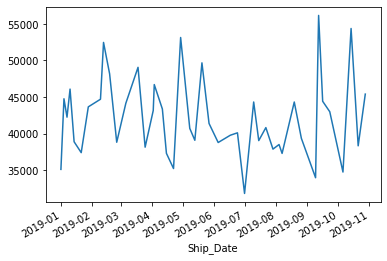

In [ ]:
training_division_dataset[training_division_dataset["Division_ID"]=="CA-FS"]["Ship_Qty"].plot()

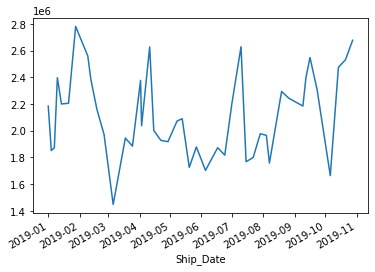

In [ ]:
training_division_dataset[training_division_dataset["Division_ID"]=="US-RTL"]["Ship_Qty"].plot()

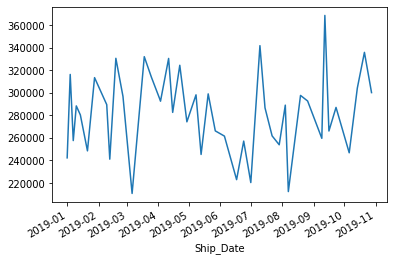

In [ ]:
training_division_dataset[training_division_dataset["Division_ID"]=="US-FS"]["Ship_Qty"].plot()

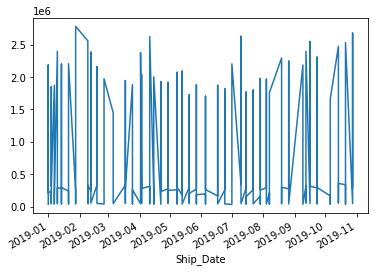

In [ ]:
training_division_dataset["Ship_Qty"].plot()

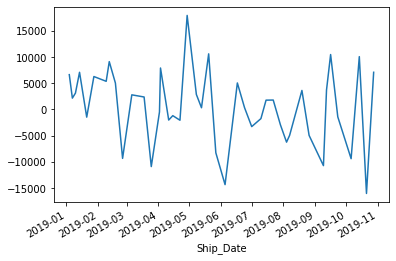

In [ ]:
#Division- CA-FS
#Removing Trend
first_diff=df_division[df_division["Division_ID"]=="CA-FS"]["Ship_Qty"].diff()[1:]
training_division_dataset[training_division_dataset["Division_ID"]=="CA-FS"]["Ship_Qty"].diff()[1:].plot()

In [ ]:

def SARIMAX_Forecasting(training_dataset,testing_dataset,order,seasonal_order):
  model = sarimax.SARIMAX(training_dataset["Ship_Qty"], order=order, seasonal_order=seasonal_order)
  model_fit=model.fit()
  testing_dataset["Prediction_Sarima"]= model_fit.predict(start=44,end=52).reset_index().drop("index",1)
  return testing_dataset


In [ ]:
attribute_dict={"US-RTL":[[1,1,0],[3,2,1,8]],"CA-FS":[[0,1,2],[3,2,1,8]],"US-FS":[[1,1,0],[3,2,1,8]],"CA-RTL":[[0,1,2],[3,2,1,8]]}

In [ ]:

df_test=pd.DataFrame()
for div in divisions:
  order=tuple(attribute_dict[div][0])
  seasonal_order=tuple(attribute_dict[div][1])
  training_dataset=training_division_dataset[training_division_dataset["Division_ID"]==div].reset_index()
  testing_dataset=testing_division_dataset[testing_division_dataset["Division_ID"]==div].reset_index()
  testing_dataset=SARIMAX_Forecasting(training_dataset,testing_dataset,order,seasonal_order)
  df_test=df_test.append(testing_dataset)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
#Merging
df_sarima = pd.merge(df_test,df_scaling,how='left',on="Division_ID")
df_sarima["Item_forecast_Sarima"]=df_sarima["Prediction_Sarima"]*df_sarima["Division_Scaling_Factor"]
df_sarima=df_sarima[["Ship_Date","Division_ID","Item_ID","Item_forecast_Sarima"]]
df_sarima=pd.merge(df_sarima,df_items[["Item_ID","Ship_Date","Ship_Qty"]],on=["Item_ID","Ship_Date"],how="left")
df_sarima=df_sarima[df_sarima["Ship_Qty"]>0]


In [ ]:
sarima_result2=pd.DataFrame()
for item in items:
  df=df_sarima[df_sarima["Item_ID"]==item]
  actual=df["Ship_Qty"]
  predicted=df["Item_forecast_Sarima"]
  mape_sarima= calculate_mape(actual,predicted)
  rmse_sarima=calculate_rmse(actual,predicted)
  sarima_result=pd.DataFrame({'Method':["SARIMA"],"Item_ID":[item],'RMSE':[rmse_sarima],'MAPE':[mape_sarima]})
  result=pd.concat([result,sarima_result],axis=0)
  sarima_result2= pd.concat([sarima_result2,pd.DataFrame({"Item_ID":[item],'RMSE_SARIMA':[rmse_sarima],'MAPE_SARIMA':[mape_sarima]})],axis=0)
result2=pd.merge(result2,sarima_result2,on=["Item_ID"],how="left")

In [ ]:
result=result.reset_index().drop("index",1)
df1=result.groupby(["Item_ID","Method"]).agg("max")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


###***PROPHET***

In [ ]:
def Prophet_Forecasting(training_dataset,testing_dataset):
  df_train = training_dataset.rename({'Ship_Date': 'ds', 'Ship_Qty': 'y'}, axis=1)
  df_test=pd.DataFrame()
  df_test["ds"]=testing_dataset["Ship_Date"]
  model=Prophet()
  model.fit(df_train)
  testing_dataset["Prediction_Prophet"]=model.predict(df_test)["yhat"]
  return testing_dataset


In [ ]:
df_test=pd.DataFrame()
for div in divisions:
  training_dataset=training_division_dataset[training_division_dataset["Division_ID"]==div].drop("Division_ID",1).reset_index()
  testing_dataset=testing_division_dataset[testing_division_dataset["Division_ID"]==div].reset_index()
  testing_dataset=Prophet_Forecasting(training_dataset,testing_dataset)
  df_test=df_test.append(testing_dataset)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
I

In [ ]:
#Merging
df_prophet = pd.merge(df_test,df_scaling,how='left',on="Division_ID")
df_prophet["Item_Forecast_Prophet"]=df_prophet["Prediction_Prophet"]*df_prophet["Division_Scaling_Factor"]
df_prophet=df_prophet[["Ship_Date","Division_ID","Item_ID","Item_Forecast_Prophet"]]
df_prophet=pd.merge(df_prophet,df_items[["Item_ID","Ship_Date","Ship_Qty"]],on=["Item_ID","Ship_Date"],how="left")
df_prophet=df_prophet[df_prophet["Ship_Qty"]>0]  #remove

In [ ]:
#Results
prophet_result2=pd.DataFrame()
for item in items:
  df=df_prophet[df_prophet["Item_ID"]==item]
  actual=df["Ship_Qty"]
  predicted=df["Item_Forecast_Prophet"]
  mape_prophet= calculate_mape(actual,predicted)
  rmse_prophet=calculate_rmse(actual,predicted)
  prophet_result=pd.DataFrame({'Method':["Prophet"],"Item_ID":[item],'RMSE':[rmse_prophet],'MAPE':[mape_prophet]})
  result=pd.concat([result,prophet_result],axis=0)
  prophet_result2= pd.concat([prophet_result2,pd.DataFrame({"Item_ID":[item],'RMSE_Prophet':[rmse_prophet],'MAPE_Prophet':[mape_prophet]})],axis=0)
result2=pd.merge(result2,prophet_result2,on=["Item_ID"],how="left")

In [ ]:
result=result.groupby(["Item_ID","Method"]).agg("max")

In [ ]:
result2

,Item_ID,RMSE_Holt,MAPE_Holt,RMSE_SARIMA,MAPE_SARIMA,RMSE_Prophet,MAPE_Prophet
0,1267128,1211.11,7.67,3793.11,22.75,2127.59,11.88
1,1267133,2322.05,27.65,3070.42,30.45,1796.50,17.95
2,1267261,52661.52,87.64,9617.78,14.72,7750.51,10.99
3,1267319,35619.89,88.11,4897.54,11.30,3828.51,7.65
4,1267375,1792.88,19.19,2877.59,31.50,2427.11,21.16
5,1267504,35364.86,84.73,12472.65,33.11,7222.12,18.36
6,1267746,81715.14,85.59,29815.81,33.90,14989.16,17.84
7,1267908,901.46,7.80,2572.62,22.62,1826.45,14.04
8,1268762,4083.68,96.74,5076.85,120.41,2654.93,60.03
9,1269237,230.43,16.62,327.60,22.28,446.10,26.51


In [ ]:
df_result_division=pd.DataFrame()
for i in range(len(result2)):
  df_result_division.loc[i,"Item_ID"]=result2.loc[i,"Item_ID"]
  df_result_division.loc[i,"MAPE"]= min(result2.loc[i,"MAPE_Holt"],result2.loc[i,"MAPE_SARIMA"],result2.loc[i,"MAPE_Prophet"])



In [ ]:
df_result_division

,Item_ID,MAPE
0,1267128.0,7.67
1,1267133.0,17.95
2,1267261.0,10.99
3,1267319.0,7.65
4,1267375.0,19.19
5,1267504.0,18.36
6,1267746.0,17.84
7,1267908.0,7.80
8,1268762.0,60.03
9,1269237.0,16.62


###**Cluster Level**

#Holt Winter Cluster

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dis

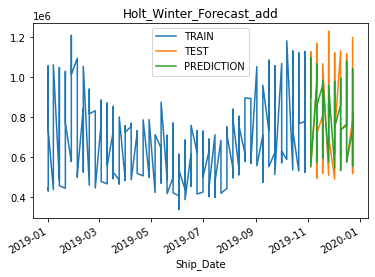

In [ ]:
#Train-Test DataSet: 80% training 20% testing
training_cluster_dataset=df_cluster[df_cluster["Ship_Date"]<datetime.datetime(2019,11,1)]
testing_cluster_dataset=df_cluster[df_cluster["Ship_Date"]>=datetime.datetime(2019,11,1)]

#x_train= training_dataset[["Division","Ship_Date"]]
training_cluster_dataset=training_cluster_dataset.set_index("Ship_Date")
testing_cluster_dataset=testing_cluster_dataset.set_index("Ship_Date")
y_train=training_cluster_dataset["Ship_Qty"]

#x_test= testing_dataset[["Division","Ship_Date"]]
y_test=testing_cluster_dataset["Ship_Qty"]

#Forecasting
operation="add"
df_test=pd.DataFrame()
#df_holt=pd.DataFrame(columns=["Ship_Date","Division","Ship_Qty","Prediction"])
for cluster in clusters:
  training_dataset=training_cluster_dataset[training_cluster_dataset["Cluster_ID"]==cluster].reset_index()
  testing_dataset=testing_cluster_dataset[testing_cluster_dataset["Cluster_ID"]==cluster].reset_index()
  training_dataset,testing_dataset=Holt_Winter_Forecasting(training_dataset,testing_dataset,operation)
  df_test=df_test.append(testing_dataset)

#Plotting
df_test=df_test.set_index("Ship_Date")
plot_title="Holt_Winter_Forecast" + "_" + operation
y_train.plot(legend=True,label='TRAIN')
y_test.plot(legend=True,label='TEST',figsize=(6,4))
df_test["Prediction_Holt"].plot(legend=True,label='PREDICTION')
plt.title(plot_title)
   
#Merging
df_test=df_test.reset_index()
df_holt = pd.merge(df_test,df_scaling_cluster,how='left',on="Cluster_ID")
df_holt["Item_forecast_Holt"]=df_holt["Prediction_Holt"]*df_holt["Cluster_Scaling_Factor"]
df_holt=df_holt[["Ship_Date","Cluster_ID","Item_ID","Item_forecast_Holt"]]
df_holt=pd.merge(df_holt,df_items[["Item_ID","Ship_Date","Ship_Qty"]],on=["Item_ID","Ship_Date"],how="left")
df_holt=df_holt[df_holt["Ship_Qty"]>0]


#Results
items=list(df_items["Item_ID"].unique())
result_cluster=pd.DataFrame()
result_cluster2=pd.DataFrame()
for item in items:
  df=df_holt[df_holt["Item_ID"]==item]
  actual=df["Ship_Qty"]
  predicted=df["Item_forecast_Holt"]
  mape_holt= calculate_mape(actual,predicted)
  rmse_holt=calculate_rmse(actual,predicted)
  holt_result=pd.DataFrame({'Method':["Holt Winter"],"Item_ID":[item],'RMSE':[rmse_holt],'MAPE':[mape_holt]})
  result_cluster=pd.concat([result_cluster,holt_result],axis=0)
  holt_result2= pd.DataFrame({"Item_ID":[item],'RMSE_Holt':[rmse_holt],'MAPE_Holt':[mape_holt]})
  result_cluster2=pd.concat([result_cluster2,holt_result2],axis=0)

#Sarima CLuster


In [ ]:
attribute_cluster_dict={0:[[1,1,0],[3,2,1,8]],1:[[0,1,2],[3,2,1,8]],2:[[1,1,0],[3,2,1,8]],3:[[0,1,2],[3,2,1,8]]}

In [ ]:
df_test=pd.DataFrame()
for cluster in clusters:
  order=(1,1,0)
  seasonal_order=(3,2,1,8)
  training_dataset=training_cluster_dataset[training_cluster_dataset["Cluster_ID"]==cluster].reset_index()
  testing_dataset=testing_cluster_dataset[testing_cluster_dataset["Cluster_ID"]==cluster].reset_index()
  testing_dataset=SARIMAX_Forecasting(training_dataset,testing_dataset,order,seasonal_order)
  df_test=df_test.append(testing_dataset)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [ ]:
#Merging
df_sarima = pd.merge(df_test,df_scaling_cluster,how='left',on="Cluster_ID")
df_sarima["Item_forecast_Sarima"]=df_sarima["Prediction_Sarima"]*df_sarima["Cluster_Scaling_Factor"]
df_sarima=df_sarima[["Ship_Date","Cluster_ID","Item_ID","Item_forecast_Sarima"]]
df_sarima=pd.merge(df_sarima,df_items[["Item_ID","Ship_Date","Ship_Qty"]],on=["Item_ID","Ship_Date"],how="left")
df_sarima=df_sarima[df_sarima["Ship_Qty"]>0]
#Results
sarima_result2=pd.DataFrame()
for item in items:
  df=df_sarima[df_sarima["Item_ID"]==item]
  actual=df["Ship_Qty"]
  predicted=df["Item_forecast_Sarima"]
  mape_sarima= calculate_mape(actual,predicted)
  rmse_sarima=calculate_rmse(actual,predicted)
  sarima_result=pd.DataFrame({'Method':["SARIMA"],"Item_ID":[item],'RMSE':[rmse_sarima],'MAPE':[mape_sarima]})
  result_cluster=pd.concat([result_cluster,sarima_result],axis=0)
  sarima_result2= pd.concat([sarima_result2,pd.DataFrame({"Item_ID":[item],'RMSE_SARIMA':[rmse_sarima],'MAPE_SARIMA':[mape_sarima]})],axis=0)
result_cluster2=pd.merge(result_cluster2,sarima_result2,on=["Item_ID"],how="left")

#Prophet Cluster

In [ ]:
df_test=pd.DataFrame()
for cluster in clusters:
  training_dataset=training_cluster_dataset[training_cluster_dataset["Cluster_ID"]==cluster].drop("Cluster_ID",1).reset_index()
  testing_dataset=testing_cluster_dataset[testing_cluster_dataset["Cluster_ID"]==cluster].reset_index()
  testing_dataset=Prophet_Forecasting(training_dataset,testing_dataset)
  df_test=df_test.append(testing_dataset)
#Merging
df_prophet = pd.merge(df_test,df_scaling,how='left',on="Cluster_ID")
df_prophet["Item_Forecast_Prophet"]=df_prophet["Prediction_Prophet"]*df_prophet["Cluster_Scaling_Factor"]
df_prophet=df_prophet[["Ship_Date","Cluster_ID","Item_ID","Item_Forecast_Prophet"]]
df_prophet=pd.merge(df_prophet,df_items[["Item_ID","Ship_Date","Ship_Qty"]],on=["Item_ID","Ship_Date"],how="left")
df_prophet=df_prophet[df_prophet["Ship_Qty"]>0]  #remove

#Results
prophet_result2=pd.DataFrame()
for item in items:
  df=df_prophet[df_prophet["Item_ID"]==item]
  actual=df["Ship_Qty"]
  predicted=df["Item_Forecast_Prophet"]
  mape_prophet= calculate_mape(actual,predicted)
  rmse_prophet=calculate_rmse(actual,predicted)
  prophet_result=pd.DataFrame({'Method':["Prophet"],"Item_ID":[item],'RMSE':[rmse_prophet],'MAPE':[mape_prophet]})
  result_cluster=pd.concat([result_cluster,prophet_result],axis=0)
  prophet_result2= pd.concat([prophet_result2,pd.DataFrame({"Item_ID":[item],'RMSE_Prophet':[rmse_prophet],'MAPE_Prophet':[mape_prophet]})],axis=0)
result_cluster2=pd.merge(result_cluster2,prophet_result2,on=["Item_ID"],how="left")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
I

In [ ]:
result_cluster2

,Item_ID,RMSE_Holt,MAPE_Holt,RMSE_SARIMA,MAPE_SARIMA,RMSE_Prophet,MAPE_Prophet
0,1267128,2498.71,17.17,2585.34,18.78,2480.09,18.14
1,1267133,1648.22,17.81,1542.89,14.23,1520.30,14.50
2,1267261,10788.07,17.53,16809.69,28.45,8668.77,11.18
3,1267319,5619.07,11.84,10508.13,23.35,5660.06,11.49
4,1267375,3533.05,39.31,3807.96,40.09,2847.03,30.74
5,1267504,9086.17,20.36,8608.73,17.12,7587.76,16.72
6,1267746,22937.92,23.40,22925.48,20.38,19800.70,19.65
7,1267908,1887.39,14.82,2627.19,21.58,1975.79,15.53
8,1268762,7510.93,175.78,7517.91,171.97,6413.19,150.54
9,1269237,293.20,18.86,379.13,19.92,341.73,21.12


In [ ]:
from google.colab import files

result_cluster2.to_csv('result_cluster2.csv', encoding = 'utf-8-sig') 
files.download('result_cluster2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_result_cluster=pd.DataFrame()
for i in range(len(result_cluster2)):
  df_result_cluster.loc[i,"Item_ID"]=result_cluster2.loc[i,"Item_ID"]
  df_result_cluster.loc[i,"MAPE_Cluster"]= min(result_cluster2.loc[i,"MAPE_Holt"],result2.loc[i,"MAPE_SARIMA"],result2.loc[i,"MAPE_Prophet"])

In [ ]:
df_result_cluster

,Item_ID,MAPE_Cluster
0,1267128.0,11.88
1,1267133.0,17.81
2,1267261.0,10.99
3,1267319.0,7.65
4,1267375.0,21.16
5,1267504.0,18.36
6,1267746.0,17.84
7,1267908.0,14.04
8,1268762.0,60.03
9,1269237.0,18.86


#Pyomo Optimization

###Variables